# covid_analysis
Written by Adam L. Soubh  
copyright www.website.com
***
* This code was developed to quatitatively explore the deaths and hospitalizations attributed to Covid-19, as well as the vaccinations against Covid-19.
  * Data for this exploration was collected between  
***
* Input(s)  
  1.  `metadata/all-states-history.csv`
  2.  `metadata/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv`
  3.  `metadata/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv`
* Output(s)
  1.  `results/deaths_to_date_dataset1.png`
  2.  `results/hospitalizations_to_date_dataset1.png`
  3.  `results/vaccination_by_state/`

In [1]:
# add state of interest by abbreviation
states_of_interest1 = ['MA','NY','FL', 'TX', 'PA', 'NJ', 'WA']

In [2]:
# import df library
import pandas as pd

# read in 'metadata/all-states-history.csv'
read_in_data1 = pd.read_csv('/Users/AdamSoubh/Documents/Code/covid_analysis/metadata/all-states-history.csv', header=0, index_col=None)

In [3]:
# create empty list to store filtered read_in_data1 data for states_of_interest only
filtered_state_data = []

# filter the read_in_data1 data for states_of_interest only
for state in states_of_interest1:
    state_data = read_in_data1[read_in_data1['state'].str.contains(state)]
    
    #store filtered data in filtered_state_data list
    filtered_state_data.append(state_data)
filtered_state_data = pd.concat(filtered_state_data)

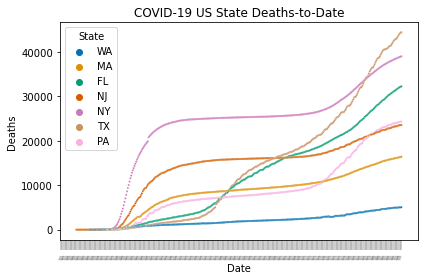

In [4]:
# filter the filtered_state_data df to show only deaths-to-date for each state
death_count = filtered_state_data[['date', 'state', 'death']]
death_count = death_count.sort_values(by=['date'])

# import visulization tools
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style("ticks")
# create scatterplot showing deaths-to-date for each state
# use colorblind palette
deaths_to_date = sns.scatterplot(x = death_count['date'], 
                    y = death_count['death'], 
                    hue = death_count['state'], 
                    palette = 'colorblind',
                    s=4)


# change legend title
legend1_title = plt.legend(title='State')

# modify x-axis ticks for optimal viewing
plt1_ticks = plt.tick_params(axis='x', labelsize=1, labelrotation=70, width=0.2, length = 10)

# change X and Y axis lables
plt1_xlabel = plt.xlabel('Date')
plt1_ylabel = plt.ylabel('Deaths')

# change plot title
plt1_title = plt.title('COVID-19 US State Deaths-to-Date')

# assure fit of plot
fit1 = plt.tight_layout()

# plt.grid(visible=True, which='major', axis='both')

# save plot
save1 = plt.savefig('/Users/AdamSoubh/Documents/Code/covid_analysis/results/deaths_to_date_dataset1.png', dpi=1000)

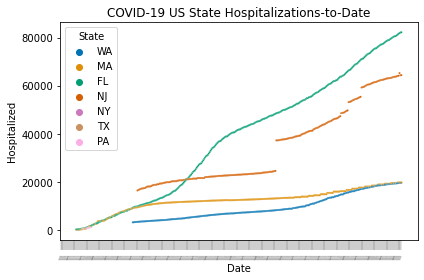

In [5]:
# filter the filtered_state_data df to show only hospitalizations-to-date for each state
hospitalizations_count = filtered_state_data[['date','state','hospitalized']]

# sort hospitalizations_count by date
hospitalizations_count = hospitalizations_count.sort_values(by=['date'])

# create scatterplot showing hospitalizations-to-date for each state
# use colorblind palette
hospitalizations_to_date = sns.scatterplot(x = hospitalizations_count['date'], 
                    y = hospitalizations_count['hospitalized'], 
                    hue = hospitalizations_count['state'], 
                    palette = 'colorblind',
                    s=4)
# change legend title
legend2_title = plt.legend(title='State')

# modify x-axis ticks for optimal viewing
plt2_ticks = plt.tick_params(axis='x', labelsize=1, labelrotation=70, width=0.2, length = 10)

# change X and Y axis lables
plt2_xlabel = plt.xlabel('Date')
plt2_ylabel = plt.ylabel('Hospitalized')

# change plot title
plt2_title = plt.title('COVID-19 US State Hospitalizations-to-Date')

# assure plot fit
fit2 = plt.tight_layout()

# save plot
save2 = plt.savefig('/Users/AdamSoubh/Documents/Code/covid_analysis/results/hospitalizations_to_date_dataset1.png', dpi=1000)

<ipython-input-6-1f96b8e56d4d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_count_data2['submission_date'] = pd.to_datetime(death_count_data2['submission_date'])


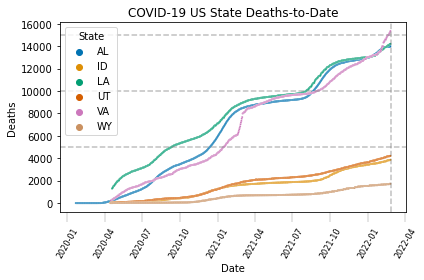

In [6]:
# read in 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
read_in_data2 = pd.read_csv('/Users/AdamSoubh/Documents/Code/covid_analysis/metadata/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv', header = 0, index_col = None)

# add state of interest by abbreviation
states_of_interest2 = ['VA', 'WY', 'AL', 'UT', 'ID', 'LA']

# create empty list to store filtered read_in_data1 data for states_of_interest only
filtered_state_data2 = []

# filter the read_in_data2 data for states_of_interest only
for state2 in states_of_interest2:
    state_data2 = read_in_data2[read_in_data2['state'].str.contains(state2)]
    
    #store filtered data in filtered_state_data2 list
    filtered_state_data2.append(state_data2)
filtered_state_data2 = pd.concat(filtered_state_data2)

death_count_data2 = filtered_state_data2[['submission_date', 'state', 'conf_death']]
death_count_data2['submission_date'] = pd.to_datetime(death_count_data2['submission_date'])
death_count_data2 = death_count_data2.sort_values(by=['state', 'submission_date'])
death_count_data2 = death_count_data2.reset_index(drop=True)

import datetime as dt

deaths_to_date_data2 = sns.scatterplot(x = death_count_data2['submission_date'], 
                    y = death_count_data2['conf_death'], 
                    hue = death_count_data2['state'], 
                    palette = 'colorblind',
                    s=4)
legend3_title = deaths_to_date_data2.legend(title='State')
plt3_ticks = deaths_to_date_data2.tick_params(axis='x', labelsize=8, labelrotation=60, width=0.2, length = 10)
plt3_xlabel = plt.xlabel('Date')
plt3_ylabel = plt.ylabel('Deaths')
plt3_title = plt.title('COVID-19 US State Deaths-to-Date')
plt.axhline(y=15000, color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=10000, color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=5000, color='grey', linestyle='--', alpha=0.5)
plt.axvline(dt.datetime(2022, 2, 25), color='grey', linestyle='--', alpha=0.5)
fit3 = plt.tight_layout()
save3 = plt.savefig('/Users/AdamSoubh/Documents/Code/covid_analysis/results/deaths_to_date_dataset2.png', dpi=500)

In [54]:
read_in_vaccine_data = pd.read_csv('/Users/AdamSoubh/Documents/Code/covid_analysis/metadata/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv', header = 0, index_col = None)
read_in_vaccine_data['Date'] = pd.to_datetime(read_in_vaccine_data['Date'])

<ipython-input-56-2cf5cb9e238f>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


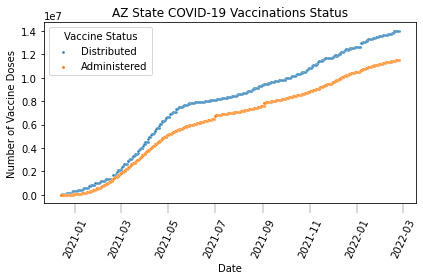

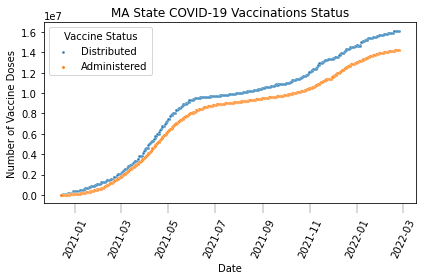

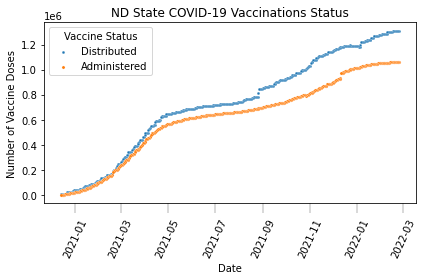

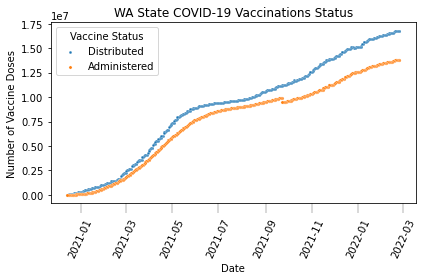

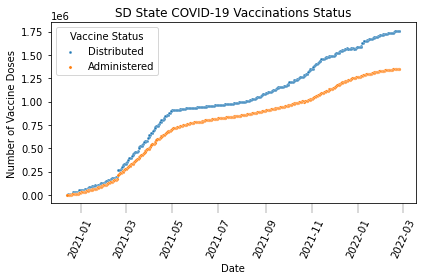

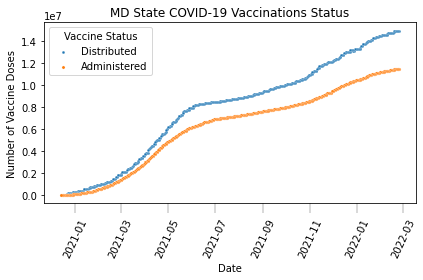

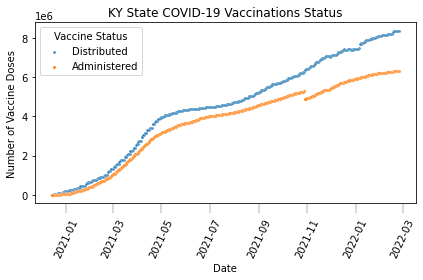

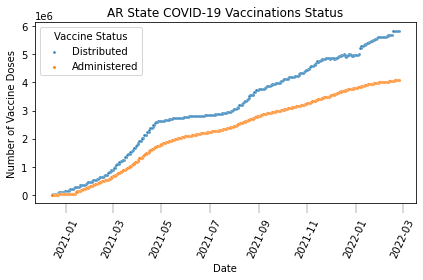

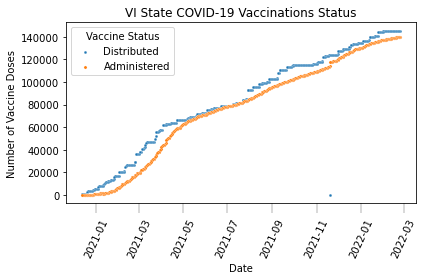

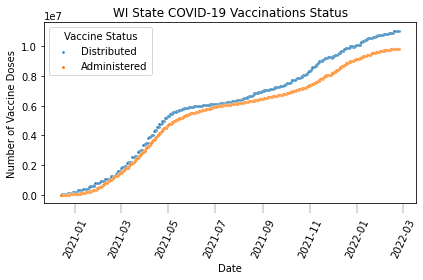

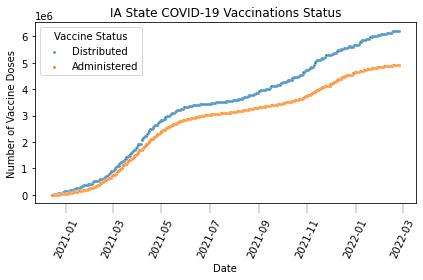

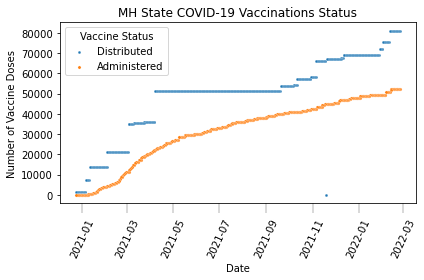

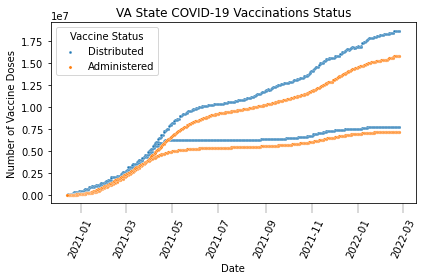

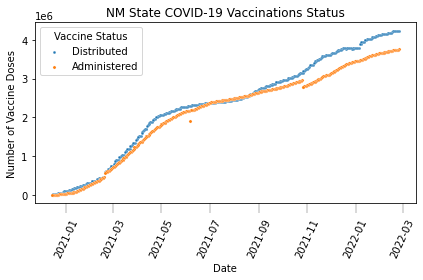

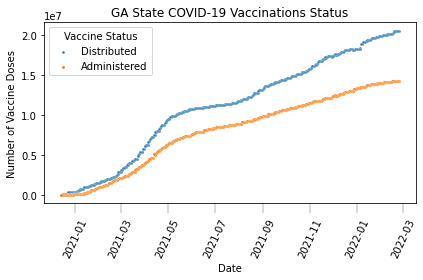

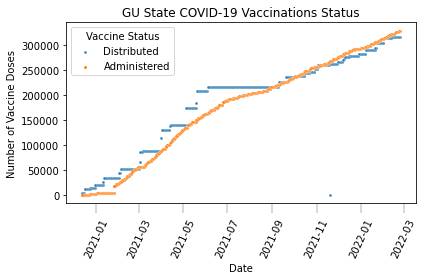

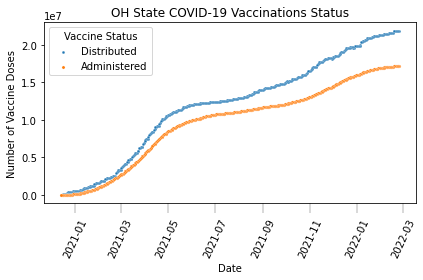

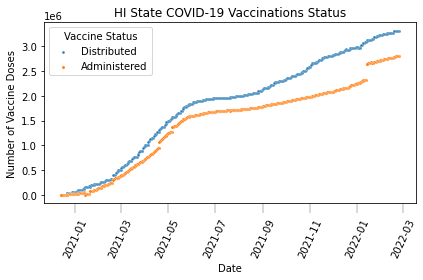

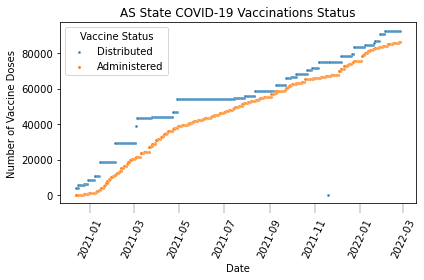

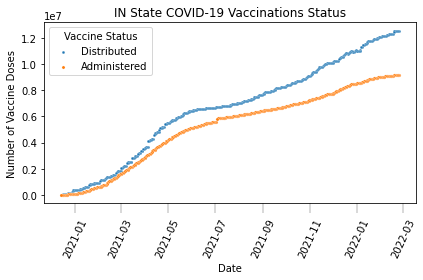

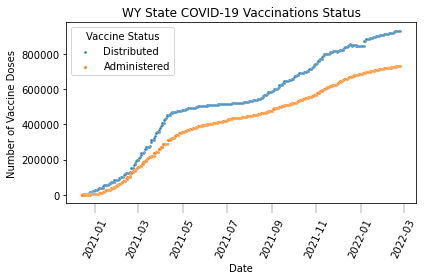

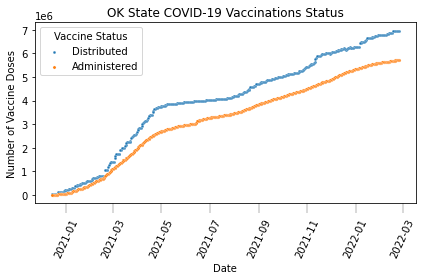

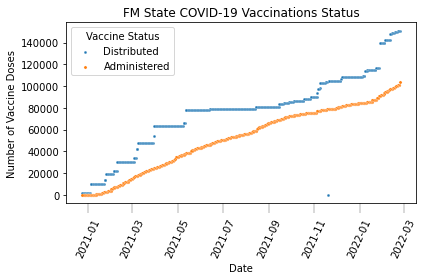

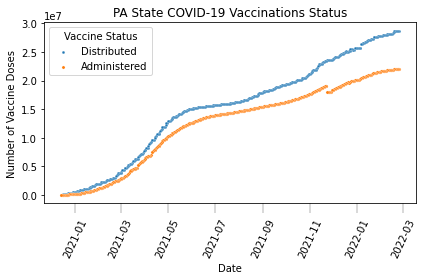

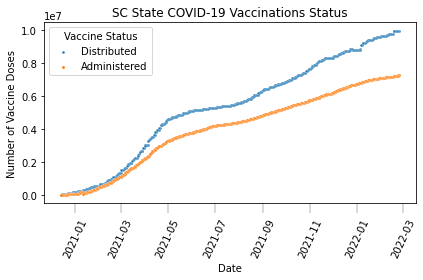

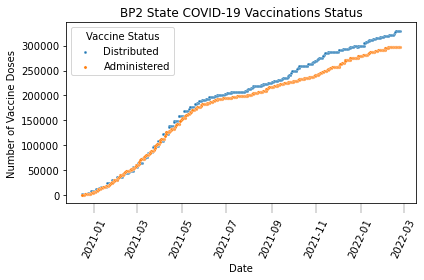

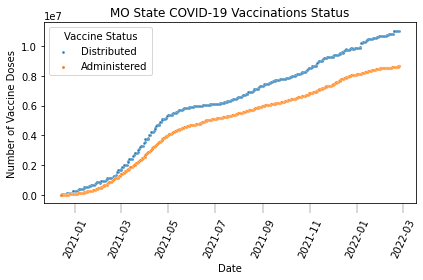

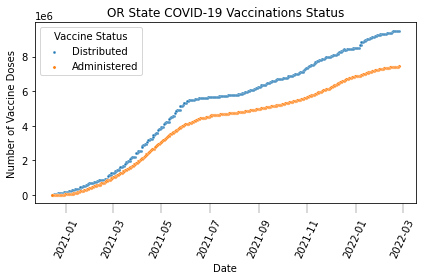

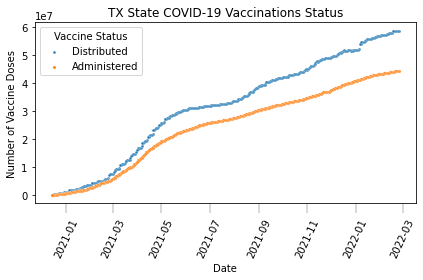

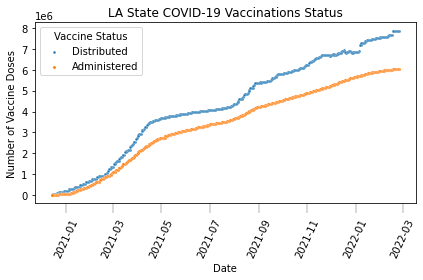

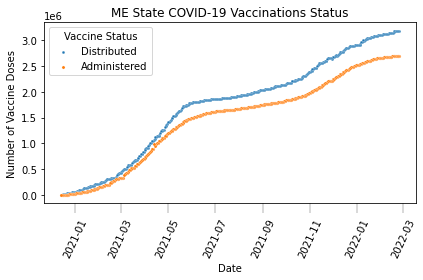

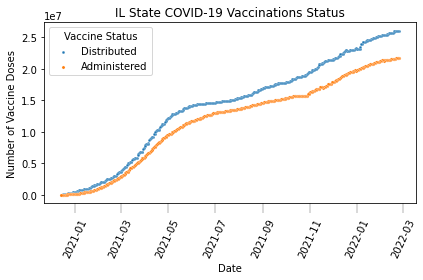

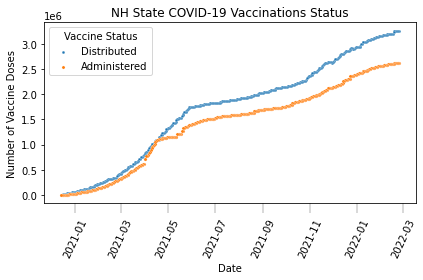

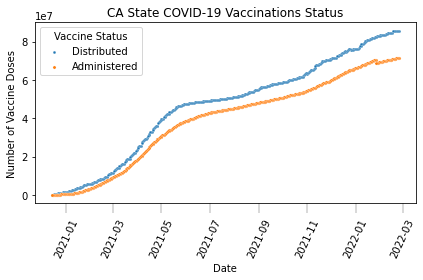

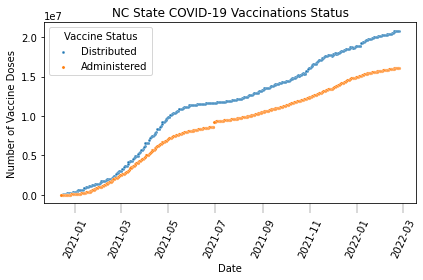

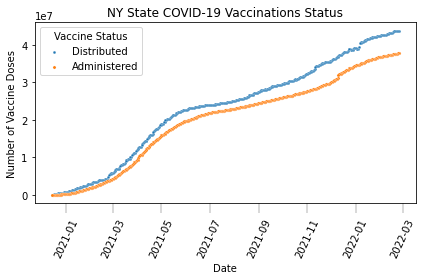

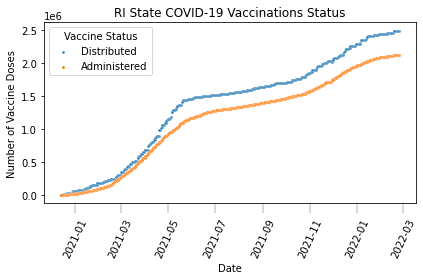

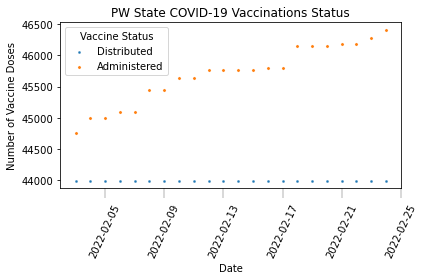

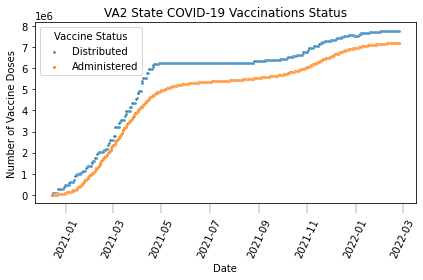

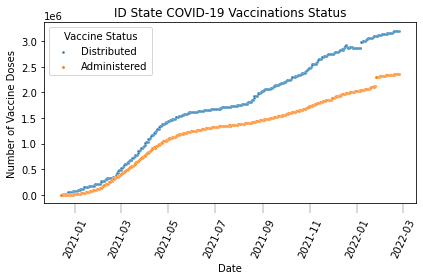

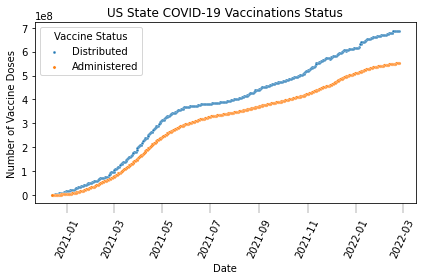

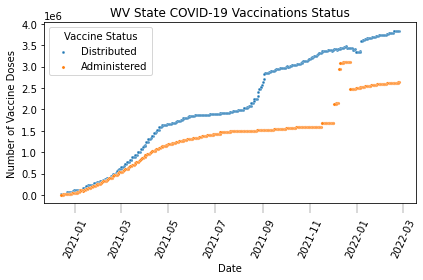

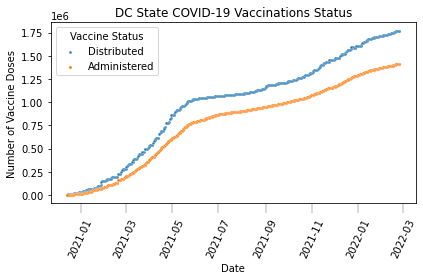

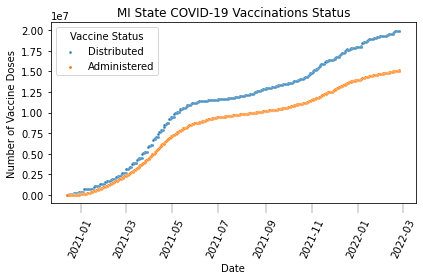

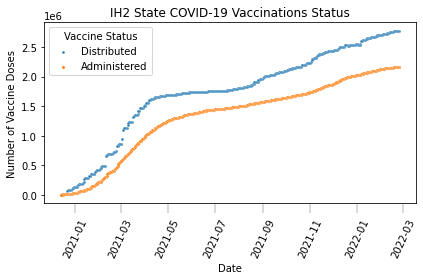

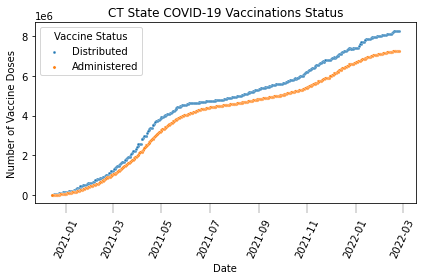

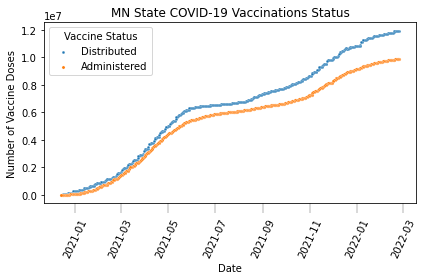

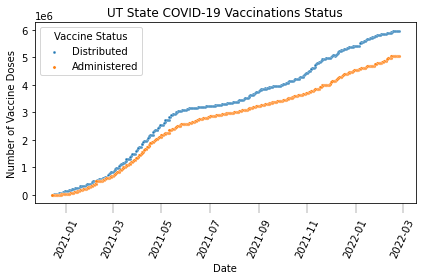

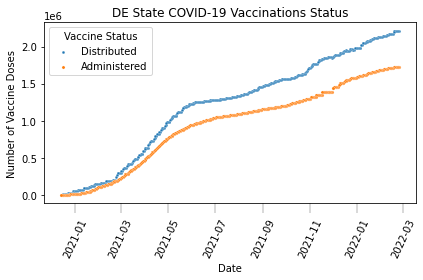

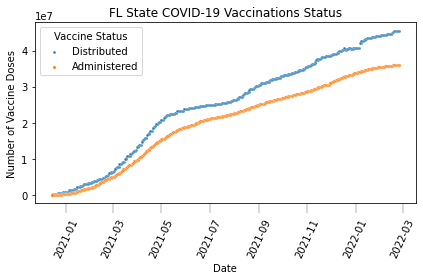

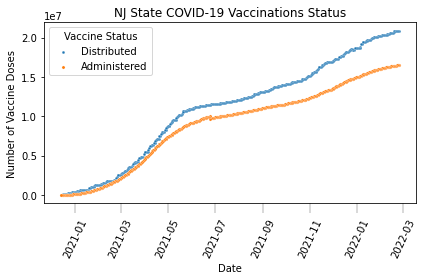

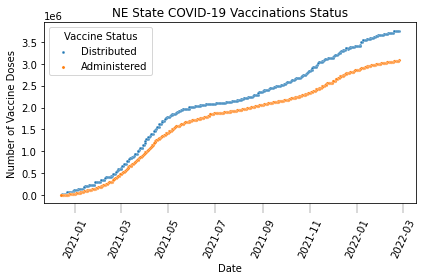

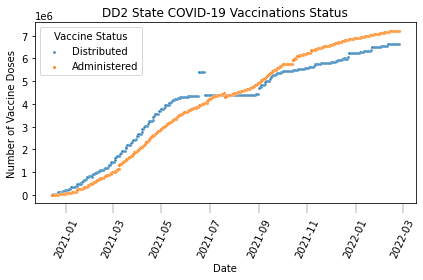

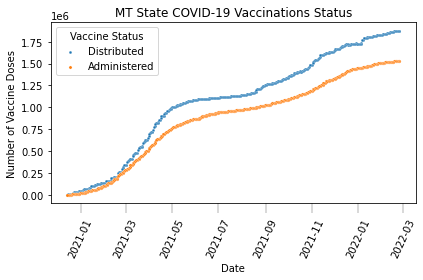

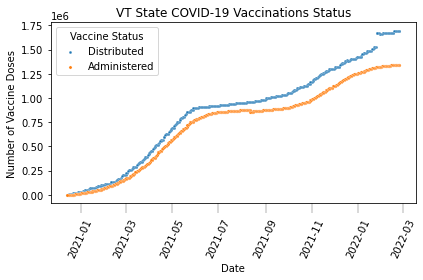

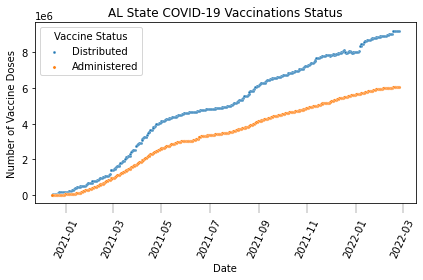

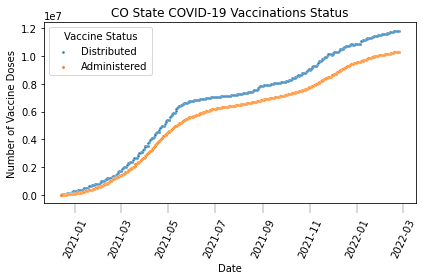

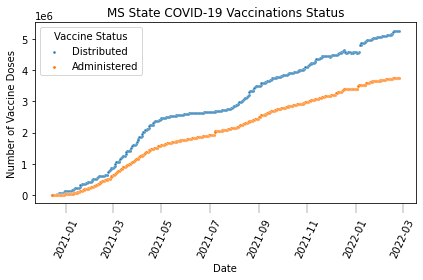

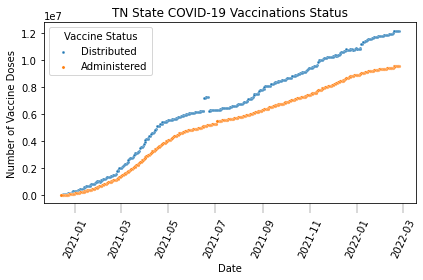

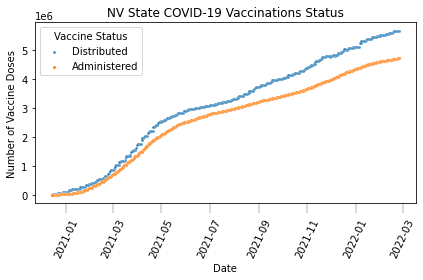

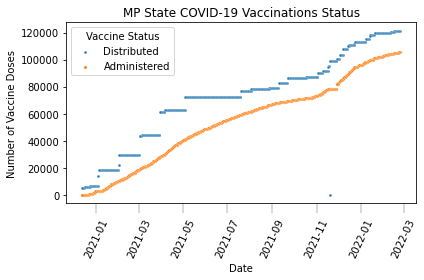

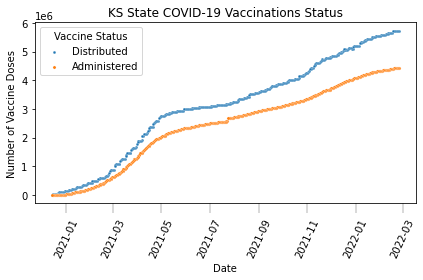

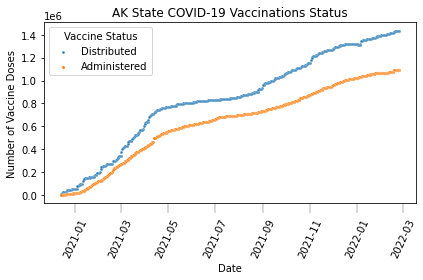

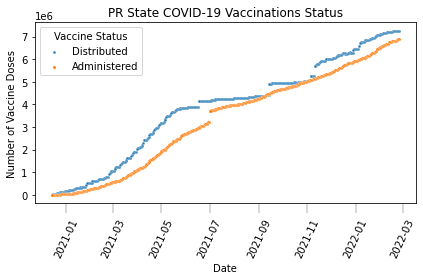

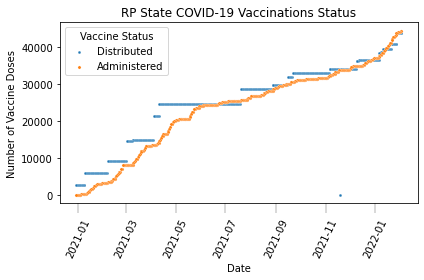

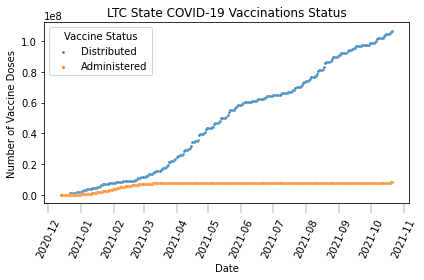

In [56]:
vax_states_of_interest = pd.unique(read_in_vaccine_data['Location'])

for state3 in vax_states_of_interest:
    state_data3 = read_in_vaccine_data[read_in_vaccine_data['Location'].str.contains(state3)]
    filtered_vaccine_data = state_data3[['Date', 'Location', 'Distributed', 'Administered']]
    filtered_vaccine_data = filtered_vaccine_data.sort_values(by='Date', ascending=False)

    fig, ax = plt.subplots()

    vaccination_distributed_to_date = sns.scatterplot(x = filtered_vaccine_data['Date'], 
                    y = filtered_vaccine_data['Distributed'], 
                    label = 'Distributed', 
                    palette = 'colorblind',
                    s=8,
                    ax=ax)
    vaccination_administered_to_date = sns.scatterplot(x = filtered_vaccine_data['Date'], 
                    y = filtered_vaccine_data['Administered'],
                    label = 'Administered',
                    palette = 'colorblind',
                    s=10,
                    ax=ax)
    plt.title(state3+' State COVID-19 Vaccinations Status')
    plt.legend(title='Vaccine Status')
    plt.tick_params(axis='x', labelsize=10, labelrotation=65, width=0.3, length = 10)
    plt.xlabel('Date')
    plt.ylabel('Number of Vaccine Doses')
    plt.tight_layout()
    plt.savefig('/Users/AdamSoubh/Documents/Code/covid_analysis/results/vaccination_by_state/'+str(state3)+'_state_vaccinations.png')